In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import matplotlib.animation as animation
import glob, re
import scienceplots

import scipy.sparse as sp
import scipy.sparse.linalg as spla


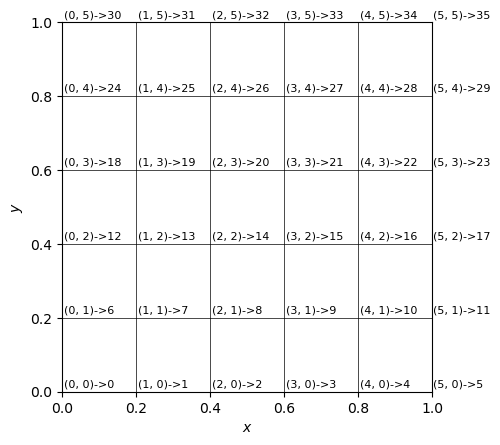

In [3]:
# Show grid lines and ticks

Lx = 1.0
Ly = 1.0
Nx = 5
Ny = 5


fig, ax = plt.subplots()
for i in range(Nx+1):
    ax.axvline(i/Nx*Lx, color='k', lw=0.5)
for j in range(Ny+1):
    ax.axhline(j/Ny*Ly, color='k', lw=0.5)
ax.set_xticks(np.linspace(0, Lx, Nx+1))
ax.set_yticks(np.linspace(0, Ly, Ny+1))
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')

# Show node numbering
delta_x = 0.004
delta_y = 0.02
for i in range(Nx+1):
    for j in range(Ny+1):
        ax.text(i/Nx*Lx+delta_x, j/Ny*Ly+delta_y, f'({i}, {j})->{i+j*(Nx+1)}', ha='left', va='center', fontsize=8)

plt.show()

Shape of A: (2601, 2601)
Shape of b: (2601,)
Number of boundary nodes: 203


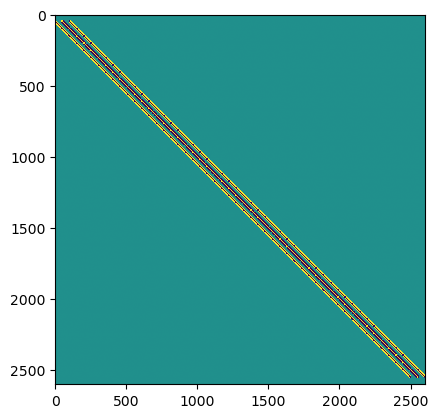

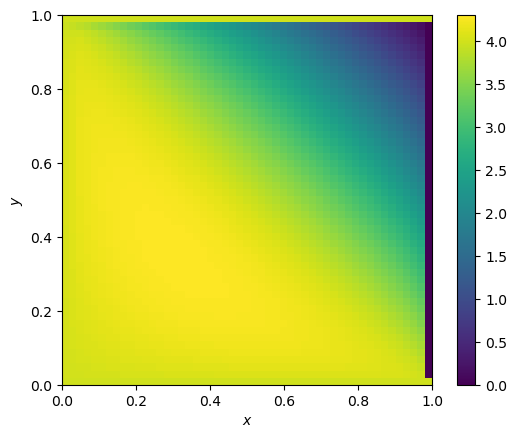

U min: -0.000
U max: 4.304


In [6]:
Lx = 1.0
Ly = 1.0
Nx = 50
Ny = 50

hx = Lx/(Nx)
hy = Ly/(Ny)
# Matrix assembly for 5-point stencil '(Nx+1)*(Ny+1)' grid points.
A_x = sp.diags([1, -2, 1], [-1, 0, 1], shape=(Nx+1, Nx+1), format='csc') / hx**2
A_y = sp.diags([1, -2, 1], [-1, 0, 1], shape=(Ny+1, Ny+1), format='csc') / hy**2
A = sp.kron(A_y, A_x, format='csc')
print(f"Shape of A: {A.shape}")
plt.imshow(A.todense(), vmin=-10, vmax=10)

def fxy(x, y):
    return -8.0

# RHS assembly with forcing function f(x, y).
b = np.zeros((Nx+1)*(Ny+1))
for i in range(Nx+1):
    for j in range(Ny+1):
        b[i+j*(Nx+1)] = fxy(i/Nx*Lx, j/Ny*Ly)

print(f"Shape of b: {b.shape}")

Nb = 0
# x = 0
for j in range(Ny):
    A[0+j*(Nx), :] = 0.0
    A[0+j*(Nx), 0+j*(Nx)] = 1.0
    b[0+j*(Nx)] = 4
    Nb += 1

# x = Lx
for j in range(Ny+1):
    A[Nx+j*(Nx+1), :] = 0.0
    A[Nx+j*(Nx+1), Nx+j*(Nx+1)] = 1.0
    b[Nx+j*(Nx+1)] = 0.0
    Nb += 1

# y = 0 (Dirichlet)
for i in range(Nx+1):
    A[i, :] = 0.0
    A[i, i] = 1.0
    b[i] = 4.0
    Nb += 1


# y = Ly
for i in range(Nx+1):
    A[i+Ny*(Nx+1), :] = 0.0
    A[i+Ny*(Nx+1), i+Ny*(Nx+1)] = 1.0
    b[i+Ny*(Nx+1)] = 4.0
    Nb += 1

print(f'Number of boundary nodes: {Nb}')


plt.imshow(A.todense(), vmin=-10, vmax=10)

# Solve linear system
u = spla.spsolve(A, b).reshape((Nx+1, Ny+1))

# Plot solution
fig, ax = plt.subplots()
im = ax.imshow(u, origin='lower', extent=[0, Lx, 0, Ly])
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_aspect('equal')
fig.colorbar(im, ax=ax)
plt.show()
# Min max
print(f'U min: {u.min():.3f}')
print(f'U max: {u.max():.3f}')



In [121]:
51*51

2601